In [1]:
##### Import packages
# Basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling packages
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# To avoid warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
##### Import data
# Check the csv's path before running it

df_acc_final = pd.read_csv('df_final.csv')
df_acc_final

,id_,mod_acc_sum,mod_acc_percentile_25,mod_acc_percentile_75,mod_acc_mean,mod_acc_median,mod_jerk_sum,mod_jerk_percentile_25,mod_jerk_percentile_75,mod_jerk_mean,mod_jerk_median,date_Hr,value_Hr,startDate_energy,endDate_energy,totalTime_energy,value_energy
0,0,1043.220073,0.995411,1.009186,1.003096,1.004628,32.751422,0.008332,0.036585,0.031492,0.018499,2020-03-30 12:45:36,53.0000,2020-03-30 12:44:59,2020-03-30 12:46:01,62.0,0.317
1,1,1062.119013,0.995555,1.037425,1.021268,1.008131,148.592177,0.025989,0.186147,0.142877,0.082003,2020-03-30 12:45:36,53.0000,2020-03-30 12:47:03,2020-03-30 12:48:05,62.0,0.335
2,2,1047.105327,0.995010,1.007831,1.006832,1.000783,80.642615,0.014164,0.062698,0.077541,0.026917,2020-03-30 12:45:36,53.0000,2020-03-30 12:48:56,2020-03-30 12:49:58,62.0,0.276
3,3,1043.340073,0.994491,1.008151,1.003212,1.004660,28.341771,0.004286,0.020944,0.027252,0.009040,2020-03-30 12:45:36,53.0000,2020-03-30 12:49:58,2020-03-30 12:51:00,62.0,0.648
4,4,1050.852598,1.006196,1.011126,1.010435,1.009513,47.547551,0.004569,0.026014,0.045719,0.008492,2020-03-30 12:51:38,49.0000,2020-03-30 12:51:00,2020-03-30 12:52:02,62.0,0.263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,1396,1043.438559,0.964027,1.022049,1.003306,0.993136,119.362367,0.019951,0.143592,0.114772,0.059097,2020-04-25 23:51:02,67.0000,2020-04-25 23:54:20,2020-04-25 23:55:22,62.0,0.546
1397,1397,1050.242694,0.995207,1.010991,1.009849,0.997482,126.172786,0.002457,0.154333,0.121320,0.036943,2020-04-25 23:51:02,67.0000,2020-04-25 23:55:22,2020-04-25 23:56:24,62.0,0.479
1398,1398,1029.323949,0.987261,0.991333,0.989735,0.989282,18.639718,0.004012,0.010716,0.017923,0.006141,2020-04-26 00:07:02,62.0000,2020-04-26 00:06:12,2020-04-26 00:07:14,62.0,0.126
1399,1399,1041.983537,0.997301,1.003573,1.001907,1.000854,31.715524,0.005222,0.018557,0.030496,0.008402,2020-04-26 00:07:02,62.0000,2020-04-26 00:08:57,2020-04-26 00:09:59,62.0,0.126


In [3]:
##### Creating Mean Absolute Percentage Error

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [4]:
##### Format change to datetime on some energy columns

for col in ['date_Hr', 'startDate_energy', 'endDate_energy']:
    df_acc_final[col] = pd.to_datetime(df_acc_final[col])

In [5]:
##### Creating new variables based on energy data

df_acc_final["time_elapsed"] = (df_acc_final["startDate_energy"] - df_acc_final["date_Hr"]).astype('timedelta64[s]')
df_acc_final["day"] = df_acc_final.date_Hr.apply(lambda x: x.day)
df_acc_final["month"] = df_acc_final.date_Hr.apply(lambda x: x.month)
df_acc_final["hour"] = df_acc_final.date_Hr.apply(lambda x: x.hour)

df_acc_final.drop(['date_Hr', 'startDate_energy', 'endDate_energy','totalTime_energy'], axis=1, inplace=True)
df_acc_final.head()

,id_,mod_acc_sum,mod_acc_percentile_25,mod_acc_percentile_75,mod_acc_mean,mod_acc_median,mod_jerk_sum,mod_jerk_percentile_25,mod_jerk_percentile_75,mod_jerk_mean,mod_jerk_median,value_Hr,value_energy,time_elapsed,day,month,hour
0,0,1043.220073,0.995411,1.009186,1.003096,1.004628,32.751422,0.008332,0.036585,0.031492,0.018499,53.0,0.317,-37.0,30,3,12
1,1,1062.119013,0.995555,1.037425,1.021268,1.008131,148.592177,0.025989,0.186147,0.142877,0.082003,53.0,0.335,87.0,30,3,12
2,2,1047.105327,0.995010,1.007831,1.006832,1.000783,80.642615,0.014164,0.062698,0.077541,0.026917,53.0,0.276,200.0,30,3,12
3,3,1043.340073,0.994491,1.008151,1.003212,1.004660,28.341771,0.004286,0.020944,0.027252,0.009040,53.0,0.648,262.0,30,3,12
4,4,1050.852598,1.006196,1.011126,1.010435,1.009513,47.547551,0.004569,0.026014,0.045719,0.008492,49.0,0.263,-38.0,30,3,12


In [6]:
##### To avoid problems while using MAPE, I multiply whole target x 10

df_acc_final.value_energy = df_acc_final.value_energy.apply(lambda x: x*10)

# Modelling

In [7]:
##### Selecting all the columns to use to modelling (also the target)
# Before trying different models, it's important to keep in mind that the problem ask us for a model with not high computational 
# costs and that does not occupy much in the memory. In addition, it's valued the simplicity, clarity and explicitness.

features = list(df_acc_final)
for col in ['id_', 'value_energy']:
    features.remove(col)

print('Columns used on X:', features)

Columns used on X: ['mod_acc_sum', 'mod_acc_percentile_25', 'mod_acc_percentile_75', 'mod_acc_mean', 'mod_acc_median', 'mod_jerk_sum', 'mod_jerk_percentile_25', 'mod_jerk_percentile_75', 'mod_jerk_mean', 'mod_jerk_median', 'value_Hr', 'time_elapsed', 'day', 'month', 'hour']


In [8]:
##### Creation of X and y

X = df_acc_final[features].values.astype('int')
y = df_acc_final['value_energy'].values.astype('int')

In [9]:
##### Creation of X and y split -- train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Decision Tree Regressor

In [10]:
##### Decision Tree Regressor
# This is a lightweight model related with memory usage and computationally

model = DecisionTreeRegressor()

params = {'criterion':['mae'],
        'max_depth': [4,5,6,7],
        'max_features': [7,8,9,10], 
        'max_leaf_nodes': [30,40,50], 
        'min_impurity_decrease' : [0.0005,0.001,0.005], 
        'min_samples_split': [2,4]}

# GridSearch
grid_solver = GridSearchCV(estimator = model, 
                   param_grid = params,
                   scoring = 'neg_median_absolute_error',
                   cv = 10,
                   refit = 'neg_median_absolute_error',
                   verbose = 0)

model_result = grid_solver.fit(X_train,y_train)

reg = model_result.best_estimator_
reg.fit(X,y)

DecisionTreeRegressor(criterion='mae', max_depth=4, max_features=7,
                      max_leaf_nodes=30, min_impurity_decrease=0.0005)

In [11]:
##### Mean Absolute Percentage Error

yhat = reg.predict(X_test)
print("Mean Absolute Percentage Error = %.2f" %mean_absolute_percentage_error(yhat,y_test),'%')

Mean Absolute Percentage Error = 40.13 %


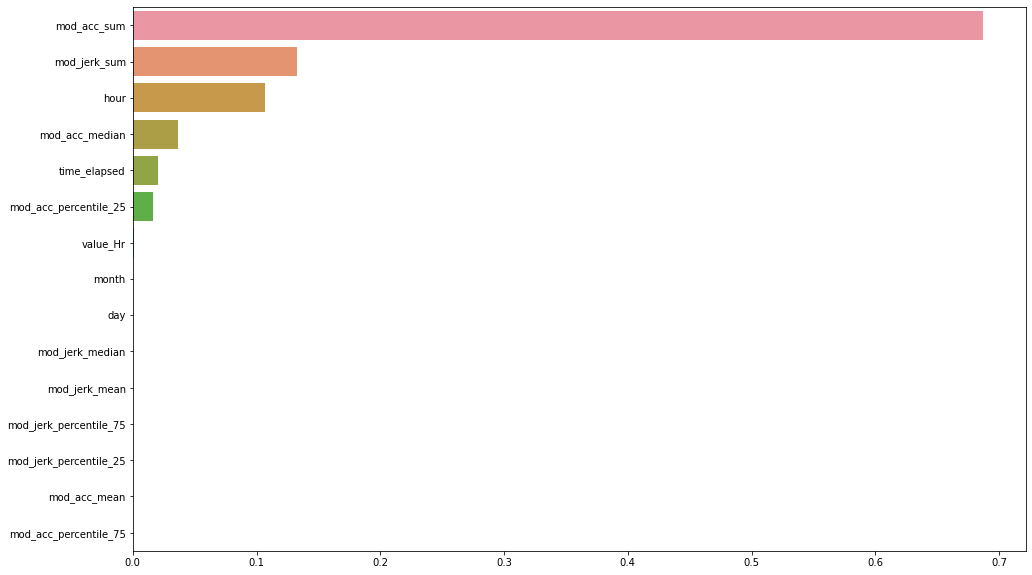

In [12]:
##### Feature Importance

features_importance = reg.feature_importances_
features_array = np.array(features)
features_array_ordered = features_array[(features_importance).argsort()[::-1]]
features_array_ordered

plt.figure(figsize=(16,10))
sns.barplot(y = features_array, x = features_importance, orient='h', order=features_array_ordered[:50])

plt.show()

## Random Forest Regressor

In [13]:
##### Random Forest Regressor
# Random Forest model should lower the metric further because it maintains the bias and reduces the variance by making 
# combinations of models with low bias and high correlations but different from one value.
# The tree has a low bias but a high variance then I will try to combine models with low bias and that aren't completely correlated
# in order to to reduce the variance to its minimum value.

model = RandomForestRegressor()

params = {'bootstrap': [True],
        'criterion':['mae'],
        'max_depth': [8,10],
        'max_features': [10,12],
        'max_leaf_nodes': [10,20,30],
        'min_impurity_decrease' : [0.001,0.01],
        'min_samples_split': [2,4],
        'n_estimators': [10,15]}

# GridSearch
grid_solver = GridSearchCV(estimator = model, 
                   param_grid = params,
                   scoring = 'neg_median_absolute_error',
                   cv = 7,
                   refit = 'neg_median_absolute_error',
                   verbose = 0)

model_result = grid_solver.fit(X_train,y_train)

reg = model_result.best_estimator_
reg.fit(X,y)

RandomForestRegressor(criterion='mae', max_depth=8, max_features=10,
                      max_leaf_nodes=30, min_impurity_decrease=0.01,
                      min_samples_split=4, n_estimators=10)

In [14]:
##### Mean Absolute Percentage Error

yhat = reg.predict(X_test)
print("Mean Absolute Percentage Error = %.2f" %mean_absolute_percentage_error(yhat,y_test),'%')

Mean Absolute Percentage Error = 36.40 %


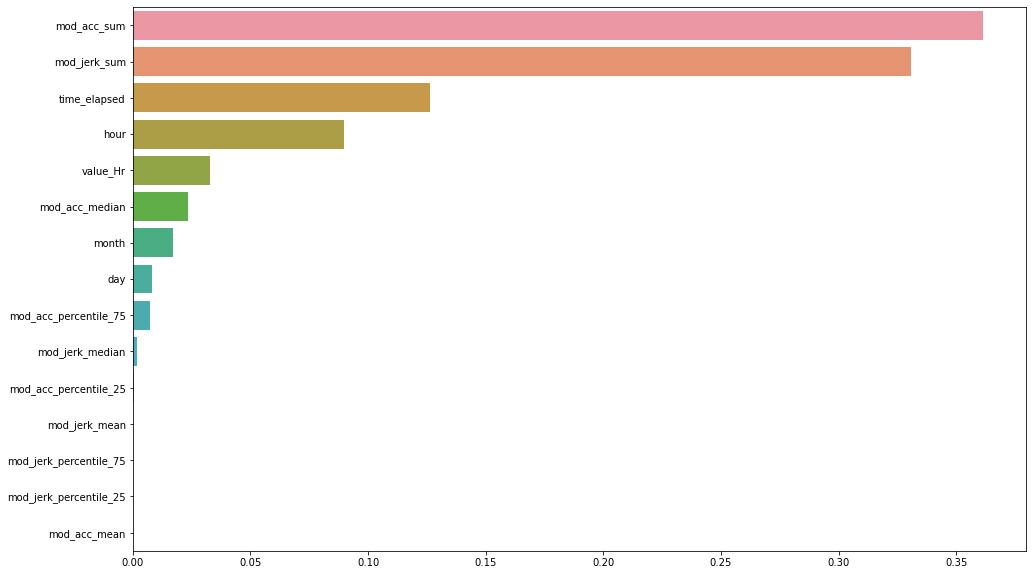

In [15]:
##### Feature Importance

features_importance = reg.feature_importances_
features_array = np.array(features)
features_array_ordered = features_array[(features_importance).argsort()[::-1]]
features_array_ordered

plt.figure(figsize=(16,10))
sns.barplot(y = features_array, x = features_importance, orient='h', order=features_array_ordered[:50])

plt.show()

## SVM

In [16]:
##### SVM linear
# Although computationally it requires more effort, once the model is trained it takes up less memory space and it is very intuitive.
# After seeing graphs on EDA, it doesn't seem that the relations are linear but while trees have much flexibility, that algorithm is based on
# cuts by hyperplanes. I'll train different kernels for SVM to see if it fits better to the problem.

# Lineal Tuning

lineal_tuning = dict()
for c in [0.001,0.01, 1]:
    svr = SVR(kernel = 'linear', C = c)
    scores = cross_val_score(svr, X, y, cv = 5, scoring = 'neg_median_absolute_error')
    lineal_tuning[c] = scores.mean()

best_score = min(lineal_tuning, key = lineal_tuning.get)
print(f'Best score = {lineal_tuning[best_score]} is achieved with c = {best_score}')

reg = SVR(kernel = 'linear', C = best_score)
reg.fit(X_train, y_train)

Best score = -1.3109062241575722 is achieved with c = 0.01


SVR(C=0.01, kernel='linear')

In [17]:
##### Mean Absolute Percentage Error

yhat = reg.predict(X_test)
print("Mean Absolute Percentage Error = %.2f" %mean_absolute_percentage_error(yhat,y_test),'%')

Mean Absolute Percentage Error = 45.94 %


In [18]:
##### SVM poly

reg = SVR(kernel = 'linear', C = 0.01)
reg.fit(X_train, y_train)

SVR(C=0.01, kernel='linear')

In [19]:
##### Mean Absolute Percentage Error

yhat = reg.predict(X_test)
print("Mean Absolute Percentage Error = %.2f" %mean_absolute_percentage_error(yhat,y_test),'%')

Mean Absolute Percentage Error = 45.94 %


In [20]:
##### SVM radial

reg = SVR(kernel = 'rbf', C = 0.01, gamma = 0.1) 
reg.fit(X_train, y_train)

SVR(C=0.01, gamma=0.1)

In [21]:
##### Mean Absolute Percentage Error

yhat = reg.predict(X_test)
print("Mean Absolute Percentage Error = %.2f" %mean_absolute_percentage_error(yhat,y_test),'%')

Mean Absolute Percentage Error = 95.22 %


# Activity Intensity

In [22]:
##### Activity Intensity
# In addition to calculate the energy expenditure, for each time interval, the level of intensity of the activity carried out must be calculated. 
# The classification of the intensity level is based on the metabolic equivalents or METS (kcal/kg*h) of the activity being:
# light activity < 3 METS, moderate 3 - 6 METS and intense > 6 METS. 
# To estimate it, I consider a person of 75 kg. The model chosen is the Random Forest Regressor which has the lowest MAPE.

reg = RandomForestRegressor(criterion='mae', max_depth=8, max_features=12,
                      max_leaf_nodes=30, min_impurity_decrease=0.001,
                      n_estimators=15)
reg.fit(X,y)

yhat = reg.predict(X)

ids = df_acc_final['id_'].to_frame()
ids['yhat'] = yhat
ids['METs'] = ids["yhat"] / (75 * 62 / 3600)

conditions = [(ids["METs"] < 3 ),((3 < ids["METs"]) & (ids["METs"] < 6)),(ids["METs"] > 6)]
names = ['ligera', 'moderada', 'intensa']
ids['intensidad'] = np.select(conditions, names)

ids

,id_,yhat,METs,intensidad
0,0,2.800000,2.167742,ligera
1,1,4.400000,3.406452,moderada
2,2,3.000000,2.322581,ligera
3,3,2.333333,1.806452,ligera
4,4,3.000000,2.322581,ligera
...,...,...,...,...
1396,1396,3.000000,2.322581,ligera
1397,1397,3.000000,2.322581,ligera
1398,1398,2.200000,1.703226,ligera
1399,1399,2.600000,2.012903,ligera


In [23]:
##### Conclusions and Future Work
# The substantial improvement that can be seen when we introduce the non-linearity of the model is relevant to deduce that
# the relationships between the variables and the target are not linear.
# The dataset doesn't have full potential to establish a clear model then more efforts should be made to collect all the information on physical
# activity, I suggest signal treatment variables such as Zero Crossing Rate, Spectral Centroid, Spectral Rolloff and MFCC - Mel-Frequency Cepstral Coefficients.
# Additional information about individuals such as age, sex and weight would help to improve the MAPE of final model.

# Time was decisive on this project (3-4h only) so some workstreams couldn't be done and would be important to have a look on.
# Extra efforts should be made in the selection of predictive variables to analyze the L1 and L2 error, otherwise we would be 
# losing explicitness, memory and battery. 